In [1]:
#Import packages
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve,auc,recall_score,precision_score,accuracy_score,f1_score
from sklearn.metrics import confusion_matrix,average_precision_score,recall_score
import seaborn as sns
%matplotlib inline

C:\Users\Racenew1\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#Print multiple statement in same line
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [7]:
#Import file
df=pd.read_csv("D:\\DefaultPayment.csv")

In [8]:
#Explore data
df.shape
type(df)
df.size
df.head()
df.tail()

(40119, 22)

pandas.core.frame.DataFrame

882618

,Customer_ID,Status_Checking_Acc,Duration_in_Months,Credit_History,Purposre_Credit_Taken,Credit_Amount,Savings_Acc,Years_At_Present_Employment,Inst_Rt_Income,Marital_Status_Gender,...,Property,Age,Other_Inst_Plans,Housing,Num_CC,Job,Dependents,Telephone,Foreign_Worker,Default_On_Payment
0,100015,A14,27,A32,A40,2570,A61,A73,3,A92,...,A121,21,A143,A151,1,A173,1,A191,A201,1
1,100031,A11,12,A34,A43,385,A61,A74,4,A92,...,A121,58,A143,A152,4,A172,1,A192,A201,0
2,100046,A12,13,A34,A43,882,A61,A72,4,A93,...,A121,23,A143,A152,2,A173,1,A191,A201,0
3,100103,A14,24,A32,A40,1393,A61,A73,2,A93,...,A121,31,A143,A152,1,A173,1,A192,A201,0
4,100104,A11,24,A32,A40,3123,A61,A72,4,A92,...,A122,27,A143,A152,1,A173,1,A191,A201,1


,Customer_ID,Status_Checking_Acc,Duration_in_Months,Credit_History,Purposre_Credit_Taken,Credit_Amount,Savings_Acc,Years_At_Present_Employment,Inst_Rt_Income,Marital_Status_Gender,...,Property,Age,Other_Inst_Plans,Housing,Num_CC,Job,Dependents,Telephone,Foreign_Worker,Default_On_Payment
40114,986907,A11,24,A32,A40,1285,A65,A74,4,A92,...,A124,32,A143,A151,1,A173,1,A191,A201,1
40115,986936,A12,24,A34,A49,1935,A61,A75,4,A91,...,A121,31,A143,A152,2,A173,1,A192,A201,1
40116,986939,A12,60,A32,A40,14027,A61,A74,4,A93,...,A124,27,A143,A152,1,A174,1,A192,A201,1
40117,986944,A12,36,A30,A43,3804,A61,A73,4,A92,...,A123,42,A143,A152,1,A173,1,A192,A201,1
40118,986974,A11,20,A34,A40,2235,A61,A73,4,A94,...,A122,33,A141,A151,2,A173,1,A191,A202,1


In [12]:
#Dummy coding using the loop structure
for col in df.columns:
    if df[col].dtype=='object':
        df[col]=pd.Categorical(df[col]).codes

In [13]:
#Check for missing values
pd.isnull(df).any()
pd.isnull(df).sum()
#Find out types of each variables, object mean string or categorical in the below output
df.info()

Customer_ID                    False
Status_Checking_Acc            False
Duration_in_Months             False
Credit_History                 False
Purposre_Credit_Taken          False
Credit_Amount                  False
Savings_Acc                    False
Years_At_Present_Employment    False
Inst_Rt_Income                 False
Marital_Status_Gender          False
Other_Debtors_Guarantors       False
Current_Address_Yrs            False
Property                       False
Age                            False
Other_Inst_Plans               False
Housing                        False
Num_CC                         False
Job                            False
Dependents                     False
Telephone                      False
Foreign_Worker                 False
Default_On_Payment             False
dtype: bool

Customer_ID                    0
Status_Checking_Acc            0
Duration_in_Months             0
Credit_History                 0
Purposre_Credit_Taken          0
Credit_Amount                  0
Savings_Acc                    0
Years_At_Present_Employment    0
Inst_Rt_Income                 0
Marital_Status_Gender          0
Other_Debtors_Guarantors       0
Current_Address_Yrs            0
Property                       0
Age                            0
Other_Inst_Plans               0
Housing                        0
Num_CC                         0
Job                            0
Dependents                     0
Telephone                      0
Foreign_Worker                 0
Default_On_Payment             0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40119 entries, 0 to 40118
Data columns (total 22 columns):
Customer_ID                    40119 non-null int64
Status_Checking_Acc            40119 non-null int8
Duration_in_Months             40119 non-null int64
Credit_History                 40119 non-null int8
Purposre_Credit_Taken          40119 non-null int8
Credit_Amount                  40119 non-null int64
Savings_Acc                    40119 non-null int8
Years_At_Present_Employment    40119 non-null int8
Inst_Rt_Income                 40119 non-null int64
Marital_Status_Gender          40119 non-null int8
Other_Debtors_Guarantors       40119 non-null int8
Current_Address_Yrs            40119 non-null int64
Property                       40119 non-null int8
Age                            40119 non-null int64
Other_Inst_Plans               40119 non-null int8
Housing                        40119 non-null int8
Num_CC                         40119 non-null int64
Job              

In [14]:
#Except the below variables all are categorical
df.describe()

,Customer_ID,Status_Checking_Acc,Duration_in_Months,Credit_History,Purposre_Credit_Taken,Credit_Amount,Savings_Acc,Years_At_Present_Employment,Inst_Rt_Income,Marital_Status_Gender,...,Property,Age,Other_Inst_Plans,Housing,Num_CC,Job,Dependents,Telephone,Foreign_Worker,Default_On_Payment
count,40119.000000,40119.000000,40119.000000,40119.000000,40119.000000,40119.000000,40119.000000,40119.000000,40119.000000,40119.000000,...,40119.000000,40119.000000,40119.000000,40119.000000,40119.000000,40119.00000,40119.000000,40119.000000,40119.000000,40119.000000
mean,552084.523642,1.576759,20.902116,2.544904,3.277624,3271.281687,1.105187,2.384207,2.973379,1.681647,...,1.358334,35.540442,1.675191,0.929011,1.407014,1.90426,1.154889,0.404198,0.037015,0.299135
std,261363.936402,1.256831,12.052772,1.083010,2.737624,2821.841476,1.579397,1.207640,1.118012,0.707829,...,1.049768,11.366368,0.705084,0.531050,0.577355,0.65324,0.361804,0.490742,0.188801,0.457885
min,100015.000000,0.000000,4.000000,0.000000,0.000000,250.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,19.000000,0.000000,0.000000,1.000000,0.00000,1.000000,0.000000,0.000000,0.000000
25%,325148.500000,0.000000,12.000000,2.000000,1.000000,1364.000000,0.000000,2.000000,2.000000,1.000000,...,0.000000,27.000000,2.000000,1.000000,1.000000,2.00000,1.000000,0.000000,0.000000,0.000000
50%,551443.000000,1.000000,18.000000,2.000000,3.000000,2320.000000,0.000000,2.000000,3.000000,2.000000,...,1.000000,33.000000,2.000000,1.000000,1.000000,2.00000,1.000000,0.000000,0.000000,0.000000
75%,778206.000000,3.000000,24.000000,4.000000,4.000000,3972.500000,2.000000,4.000000,4.000000,2.000000,...,2.000000,42.000000,2.000000,1.000000,2.000000,2.00000,1.000000,1.000000,0.000000,1.000000
max,999961.000000,3.000000,72.000000,4.000000,9.000000,18424.000000,4.000000,4.000000,4.000000,3.000000,...,3.000000,75.000000,2.000000,2.000000,4.000000,3.00000,2.000000,1.000000,1.000000,1.000000


In [16]:
#Find out number of customers who are defaults and non defaults
print('Count of Labels')
df.groupby("Default_On_Payment").size()

Count of Labels


Default_On_Payment
0    28118
1    12001
dtype: int64

In [17]:
df.columns

Index(['Customer_ID', 'Status_Checking_Acc', 'Duration_in_Months',
       'Credit_History', 'Purposre_Credit_Taken', 'Credit_Amount',
       'Savings_Acc', 'Years_At_Present_Employment', 'Inst_Rt_Income',
       'Marital_Status_Gender', 'Other_Debtors_Guarantors',
       'Current_Address_Yrs', 'Property', 'Age', 'Other_Inst_Plans ',
       'Housing', 'Num_CC', 'Job', 'Dependents', 'Telephone', 'Foreign_Worker',
       'Default_On_Payment'],
      dtype='object')

In [19]:
#Create Independent Variable
x=df.loc[:,('Status_Checking_Acc', 'Duration_in_Months',
       'Credit_History', 'Purposre_Credit_Taken', 'Credit_Amount',
       'Savings_Acc', 'Years_At_Present_Employment', 'Inst_Rt_Income',
       'Marital_Status_Gender', 'Other_Debtors_Guarantors',
       'Current_Address_Yrs', 'Property', 'Age', 'Other_Inst_Plans ',
       'Housing', 'Num_CC', 'Job', 'Dependents', 'Telephone', 'Foreign_Worker')]
x.head()
x.shape

,Status_Checking_Acc,Duration_in_Months,Credit_History,Purposre_Credit_Taken,Credit_Amount,Savings_Acc,Years_At_Present_Employment,Inst_Rt_Income,Marital_Status_Gender,Other_Debtors_Guarantors,Current_Address_Yrs,Property,Age,Other_Inst_Plans,Housing,Num_CC,Job,Dependents,Telephone,Foreign_Worker
0,3,27,2,0,2570,0,2,3,1,0,3,0,21,2,0,1,2,1,0,0
1,0,12,4,4,385,0,3,4,1,0,3,0,58,2,1,4,1,1,1,0
2,1,13,4,4,882,0,1,4,2,2,4,0,23,2,1,2,2,1,0,0
3,3,24,2,0,1393,0,2,2,2,2,2,0,31,2,1,1,2,1,1,0
4,0,24,2,0,3123,0,1,4,1,0,1,1,27,2,1,1,2,1,0,0


(40119, 20)

In [20]:
#Create dependent variable
y=df['Default_On_Payment']
y.head()

0    1
1    0
2    0
3    0
4    1
Name: Default_On_Payment, dtype: int64

In [21]:
# Now we raedy for building models using this converted data

In [58]:
#Create train and test data 85% and 15% split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.15,random_state=1)
train_x.shape
test_x.shape
train_y.shape
test_y.shape
type(train_x)

(34101, 20)

(6018, 20)

(34101,)

(6018,)

pandas.core.frame.DataFrame

In [59]:
#Build a Logistic regression model
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()

In [60]:
log.fit(train_x,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [61]:
log.coef_

array([[ -5.79033754e-01,   2.32229145e-02,  -3.70706198e-01,
         -2.99125035e-02,   9.38132808e-05,  -2.29334677e-01,
         -1.66881133e-01,   3.13167540e-01,  -2.40874820e-01,
         -3.63969484e-01,   1.22423063e-02,   2.02262959e-01,
         -6.81234635e-03,  -3.01774334e-01,  -3.30397255e-01,
          2.83803261e-01,  -2.48756151e-02,   1.67124753e-01,
         -3.04897101e-01,  -9.86938225e-01]])

In [70]:
#Find out key predictor of Defaulter
coeff=pd.concat([pd.DataFrame(x.columns),pd.DataFrame(np.transpose(log.coef_))],axis=1)
coeff.columns=("Variable","Coeff")
coeff.sort_values("Coeff",ascending=False)

,Variable,Coeff
7,Inst_Rt_Income,0.313168
15,Num_CC,0.283803
11,Property,0.202263
17,Dependents,0.167125
1,Duration_in_Months,0.023223
10,Current_Address_Yrs,0.012242
4,Credit_Amount,0.000094
12,Age,-0.006812
16,Job,-0.024876
3,Purposre_Credit_Taken,-0.029913


In [63]:
#Generate Model Diagnostics
classes=log.predict(test_x)
print(classes.size)
print('Positive Cases in Test Data:',test_y[test_y==1].shape[0])
print('Negative Cases in Test Data:',test_y[test_y==0].shape[0])

6018
Positive Cases in Test Data: 1774
Negative Cases in Test Data: 4244


In [64]:
#Precision and Recall
print("Accuracy Score")
print(metrics.accuracy_score(test_y,classes))
print("Precision/Recall Metrics")
print(metrics.classification_report(test_y,classes))
print("AUC")
auc=metrics.roc_auc_score(test_y,classes)
auc

Accuracy Score
0.7789963443
Precision/Recall Metrics
             precision    recall  f1-score   support

          0       0.81      0.89      0.85      4244
          1       0.67      0.50      0.57      1774

avg / total       0.77      0.78      0.77      6018

AUC


0.69862884879190146

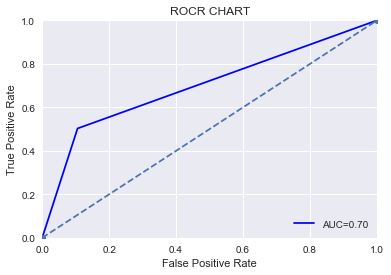

In [65]:
#ROC Chart
fpr,tpr,th=roc_curve(test_y,classes)
roc_auc=metrics.auc(fpr,tpr)
import matplotlib.pyplot as plt
plt.title('ROCR CHART')
plt.plot(fpr,tpr,'b',label='AUC=%0.2f'% roc_auc)
plt.legend(loc="lower right")
plt.plot([0,1],[0,1],'o--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

Confusion Matrix


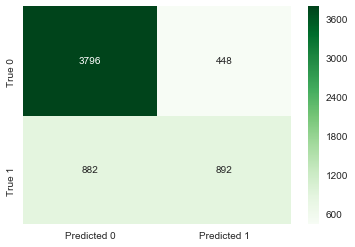

In [66]:
#Confusion Matrix
print("Confusion Matrix")
cf=metrics.confusion_matrix(test_y,classes)
lbl1=["Predicted 0","Predicted 1"]
lbl2=["True 0","True 1"]
sns.heatmap(cf,annot=True,cmap="Greens",fmt="d",xticklabels=lbl1,yticklabels=lbl2)
plt.show();